<a href="https://colab.research.google.com/github/joelpawar08/All-DL-and-ML-Alogs-with-Examples/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]
Feature Importance - Math Score: 0.696, English Score: 0.304


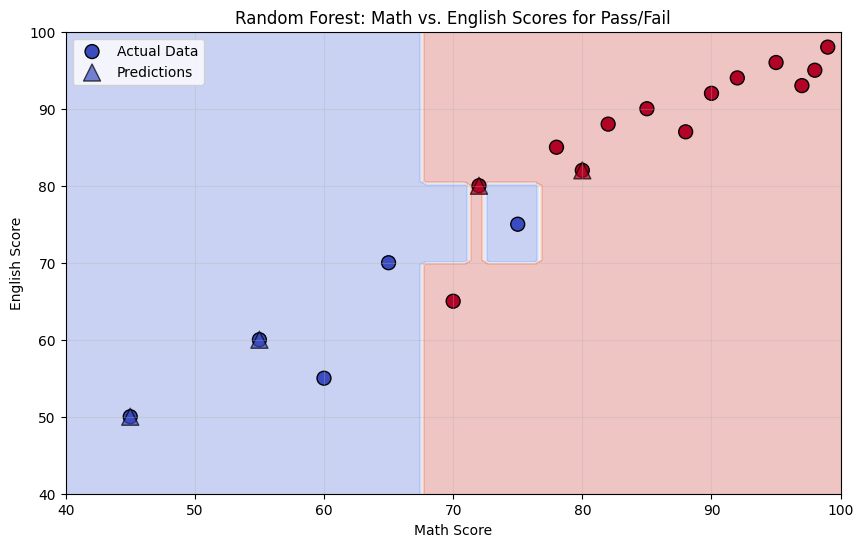


New Student (Math: 82, English: 85)
Predicted Probability of Passing: 0.300
Final Prediction: FAIL


In [3]:
# Import necessary libraries
# numpy for numerical operations, matplotlib and seaborn for plotting, sklearn for machine learning
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Create a self-made dataset
# Simulate student exam scores (Math, English) vs. Pass/Fail outcomes (binary classification)
# Features: Math score, English score; Label: Pass (1) or Fail (0)
np.random.seed(42)  # For reproducibility
math_scores = np.array([45, 55, 60, 65, 70, 72, 75, 78, 80, 82, 85, 88, 90, 92, 95, 97, 98, 99])
english_scores = np.array([50, 60, 55, 70, 65, 80, 75, 85, 82, 88, 90, 87, 92, 94, 96, 93, 95, 98])
scores = np.column_stack((math_scores, english_scores))  # Combine into 2D feature matrix
pass_fail = np.array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])  # Labels: Pass (1) or Fail (0)

# Step 2: Split data into training and testing sets
# 80% training, 20% testing to evaluate model performance
x_train, x_test, y_train, y_test = train_test_split(scores, pass_fail, test_size=0.2, random_state=42)

# Step 3: Create and fit the Random Forest model
# Random Forest builds multiple decision trees and aggregates their predictions
model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=42)  # 10 trees, max depth 3
model.fit(x_train, y_train)  # Train the model on training data

# Step 4: Make predictions
# Predict pass/fail for test data
y_pred = model.predict(x_test)

# Step 5: Evaluate the model
# Accuracy measures % of correct predictions; confusion matrix shows true vs. predicted labels
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

# Step 6: Feature importance
# Random Forest provides importance scores for each feature (Math, English)
feature_importance = model.feature_importances_
print(f"Feature Importance - Math Score: {feature_importance[0]:.3f}, English Score: {feature_importance[1]:.3f}")

# Step 7: Visualize the data and decision boundary
# Plot decision boundary for 2D feature space (Math vs. English scores)
plt.figure(figsize=(10, 6))
xx, yy = np.meshgrid(np.linspace(40, 100, 100), np.linspace(40, 100, 100))  # Grid for plotting
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  # Predict for each grid point
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')  # Plot decision boundary
plt.scatter(scores[:, 0], scores[:, 1], c=pass_fail, s=100, edgecolors='k', cmap='coolwarm', label='Actual Data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, s=150, marker='^', edgecolors='k', cmap='coolwarm', alpha=0.7, label='Predictions')  # Corrected line
plt.xlabel('Math Score')
plt.ylabel('English Score')
plt.title('Random Forest: Math vs. English Scores for Pass/Fail')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 8: Predict for a new student
new_student = np.array([[22, 25]])  # Math: 82, English: 85
prediction = model.predict(new_student)
prob_pass = model.predict_proba(new_student)[:, 1][0]
print(f"\nNew Student (Math: 82, English: 85)")
print(f"Predicted Probability of Passing: {prob_pass:.3f}")
print(f"Final Prediction: {'PASS' if prediction[0] == 1 else 'FAIL'}")

# Explanation of Random Forest:
# - Ensemble of decision trees; each tree votes, and majority determines the outcome
# - Handles non-linear relationships and feature interactions
# - Feature importance shows which features (Math/English) drive predictions
# - Robust to overfitting compared to single decision trees
# - Assumptions: Sufficient data, independent features
# - Use case: Classification tasks with complex patterns